** 1.Load and visualize dataset (optional PCA for 2D view).**

Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


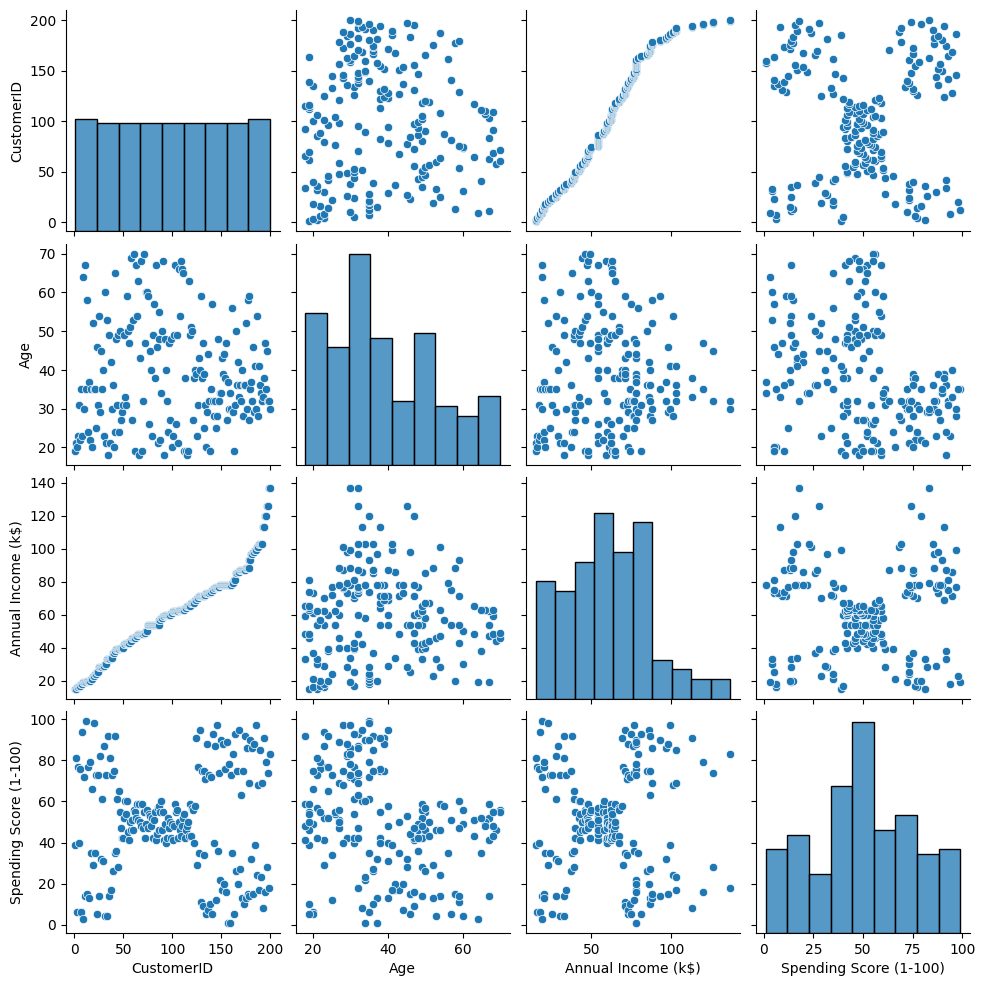

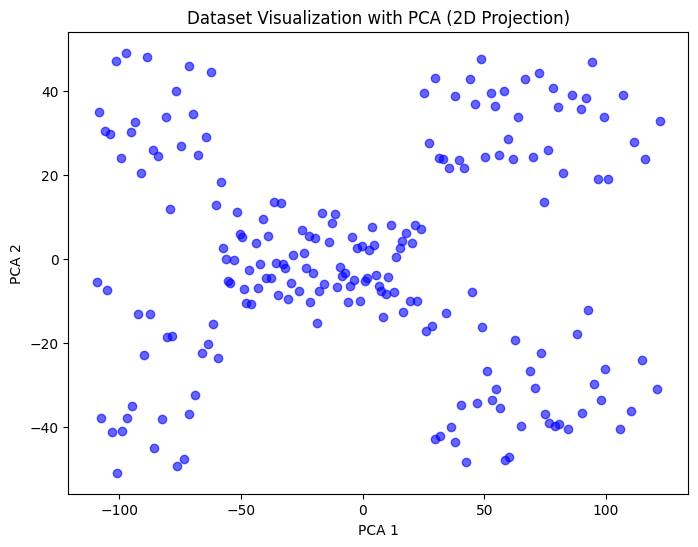

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Load dataset (replace with your file name)
df = pd.read_csv("/content/Mall_Customers.csv")

# Basic info
print("Dataset Shape:", df.shape)
print(df.head())

# Select only numeric columns for clustering
X = df.select_dtypes(include=[np.number])

# Pairplot (if not too many features, else PCA is better)
if X.shape[1] <= 5:  # If 5 or fewer numeric features
    sns.pairplot(X)
    plt.show()

# Optional PCA for 2D visualization
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, c='blue')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("Dataset Visualization with PCA (2D Projection)")
    plt.show()


**2.Fit K-Means and assign cluster labels.**

In [3]:
from sklearn.cluster import KMeans

# Assume X is your numeric data from Step 1
# Example: X = df.select_dtypes(include=[np.number])

# Choose a value for k (we'll refine later with Elbow Method)
k = 3

# Fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels back to dataset
df['Cluster'] = labels

print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


** 3.Use the Elbow Method to find optimal K.**

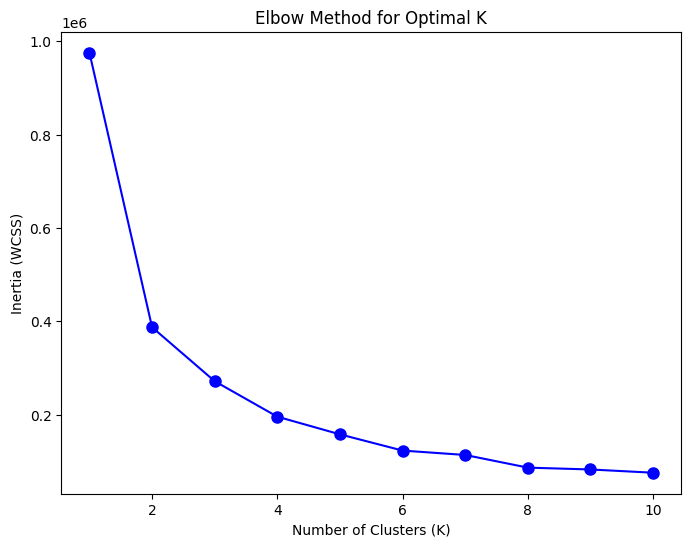

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assume X is your numeric dataset
inertia = []
K = range(1, 11)  # test k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


** 4.Visualize clusters with color-coding.**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


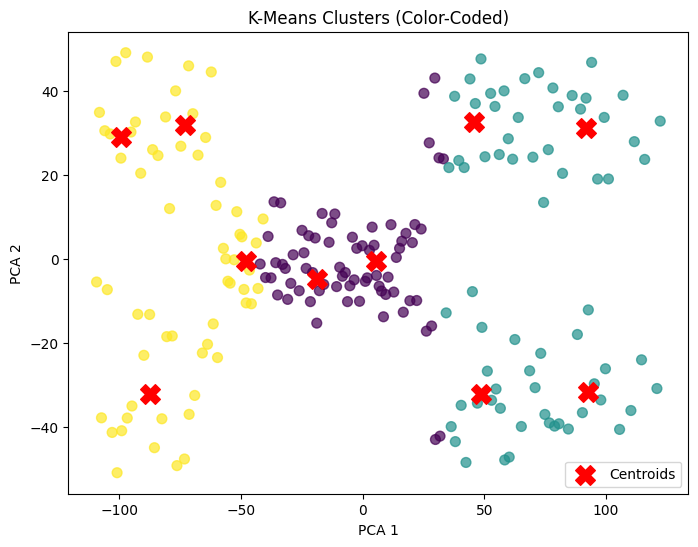

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters with color-coding
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centroids (in PCA space)
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.scatter(centers_pca[:,0], centers_pca[:,1],
            c='red', s=200, marker='X', label='Centroids')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clusters (Color-Coded)")
plt.legend()
plt.show()


** 5.Evaluate clustering using Silhouette Score.**

In [6]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X, labels)

print("Silhouette Score:", score)


Silhouette Score: 0.37674423270868146


K=2, Silhouette Score=0.479
K=3, Silhouette Score=0.377
K=4, Silhouette Score=0.423
K=5, Silhouette Score=0.434
K=6, Silhouette Score=0.414
K=7, Silhouette Score=0.360
K=8, Silhouette Score=0.404
K=9, Silhouette Score=0.367
K=10, Silhouette Score=0.347


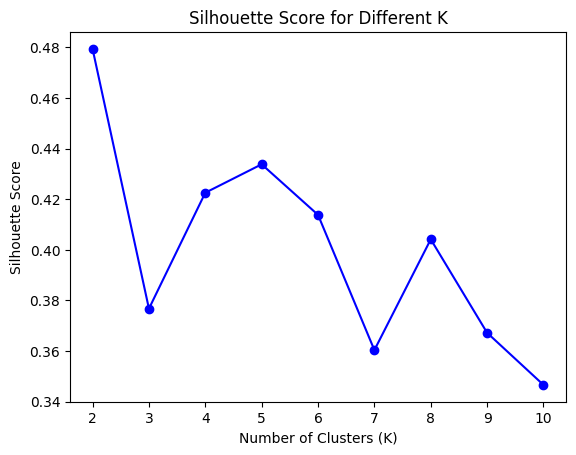

In [7]:
scores = []
K = range(2, 11)  # silhouette score requires at least 2 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

# Plot silhouette scores
plt.plot(K, scores, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.show()
